In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

from sklearn.model_selection import train_test_split

In [17]:
# pip install mglearn
import mglearn
from sklearn.datasets import load_breast_cancer, load_boston

## 1. 샘플 소개

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, '두번째 특성')

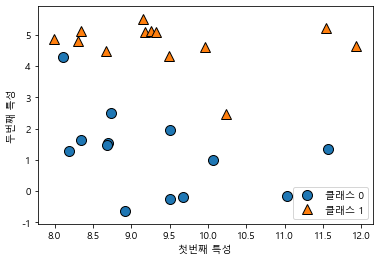

In [9]:
# 이진 분류용 데이터셋

X, y = mglearn.datasets.make_forge()
# print(X)
# print(y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")

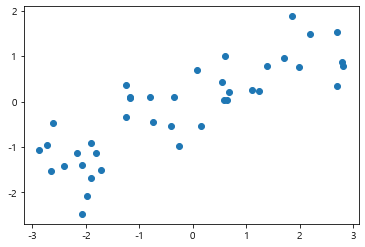

In [14]:
# 선형 회귀용 샘플

X, y = mglearn.datasets.make_wave(n_samples=40)
# print(X, y)

plt.plot(X, y, 'o')
plt.xlabel("특성")
plt.ylabel("타겟")

In [26]:
cancer = load_breast_cancer()
# print(cancer)
print(cancer.keys())
cancer.data
cancer.target
# print(cancer.DESCR)
type(cancer)
cancer.data.shape

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


(569, 30)

In [28]:
boston = load_boston()
boston.data.shape
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

---

## 2. 용어 정리

#### (1) 과대 적합

- 훈련 데이터셋의 각 샘플에 너무 가깝게 맞춰져 있어서 복잡한 모델을 만들게 되는 것


#### (2) 과소 적합

- 너무 간단한 모델이 선택되는 것

#### (3) 일반화

- 처음 보는 데이터에 대해서 정확하게 예측할 수 있는 것

---

## 3. KNN ( K - Nearest Neighbors)

### (1) 특징

+ 이해하기 쉽고 직관적인 모델
+ 더 복잡한 알고리즘을 적용하기 전에 시도해 볼 수 있는 알고리즘
+ 훈련셋이 너무 크면 예측이 느려진다.

### (2) 파라미터(하이퍼 파라미터)

+ 이웃의 갯수(K)
+ 데이터 사이의 거리를 재는 방법 : L2 norm

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


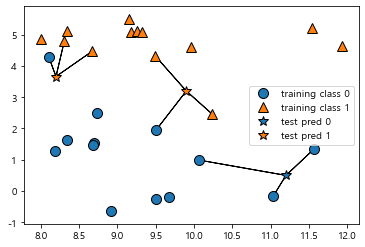

In [30]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

---

### (3) L1 norm, L2 norm

+ L1 norm
    - 단순한 거리의 절대값의 합
    - 맨하탄 거리
    
    
    
+ L2 norm
    - 거리의 절대값의 합에 루트 적용
    - 피타고라스 정리, 유클리드 거리

In [31]:
df = pd.DataFrame(np.random.randint(low=1, high=10, size=(3, 2)))
df.columns = ["x", "y"]
df

,x,y
0,6,7
1,3,8
2,9,1


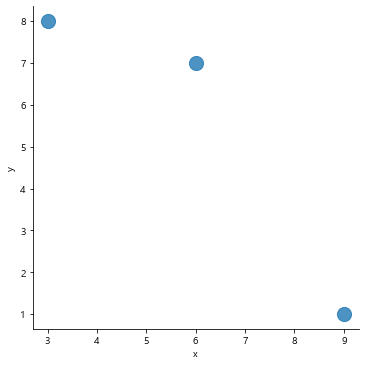

In [34]:
sns.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s":200})

In [36]:
##### (0, 0)으로 부터 어디가 제일 가까울까?
# 데이터의 최단 거리를 구하는 것이기 때문에 L2 norm 을 사용한다.
from numpy import linalg

dt_point = df.values
dt_point

linalg.norm(dt_point, ord=2, axis=1)

array([9.21954446, 8.54400375, 9.05538514])

In [38]:
##### 3명이 주사위를 3번 던진 후 걸음 수 측정
df = pd.DataFrame(np.random.randint(low=-3, high=3, size=(3, 3)))
df.columns = ["move_1", "move_1", "move_3"]
df

,move_1,move_1,move_3
0,-1,0,1
1,1,-2,-1
2,-3,-2,0


In [39]:
##### 누가 가장 많이 걸었을까?
# 데이터의 거리 합을 구하는 것이기 때문에 L1 norm을 사용한다.

linalg.norm(df.values, ord=1, axis=1)

array([2., 4., 5.])

---

### (4) KNN 구현

In [45]:
X, y = mglearn.datasets.make_forge()
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26, 2)
(19, 2) (7, 2) (19,) (7,)


In [46]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [49]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [50]:
clf.score(X_test, y_test)

0.8571428571428571